In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

new_df_all_nopq_shuffled = pd.read_pickle("new_df_all_nopq_shuffled.pkl")

# new_df_all_2pq_shuffled = pd.read_pickle("new_df_all_2pq_shuffled.pkl")

new_df_all_25pq_shuffled = pd.read_pickle("new_df_all_25pq_shuffled.pkl")

# new_df_all_jpsi4pi_sigma = pd.read_pickle("new_df_all_jpsi4pi_sigma.pkl")

# new_df_jpsi4pi_sigma_filtered = pd.read_pickle("new_df_jpsi4pi_sigma_filtered.pkl")

training_new_df_all_nopq_shuffled = pd.read_pickle("training_new_df_all_nopq_shuffled.pkl")

In [5]:
# new_df_jpsi4pi_sigma_filtered

In [6]:
df = pd.DataFrame(new_df_all_25pq_shuffled)
df

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.117735,2,2.305854,0.203629,0.269269,0.598220,0.189089,2.491949,0.436979,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
1,1,3.045590,2,2.388058,0.078351,0.018395,0.269342,0.477320,2.331037,0.117997,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
2,2,3.186154,2,2.364736,0.000038,0.062227,0.385927,0.335219,2.394266,0.101664,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
3,3,3.124246,2,2.363794,0.004084,0.066061,0.377792,0.363086,2.321129,0.150950,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
4,4,3.123685,2,2.326507,0.132444,0.196801,0.520402,0.249151,2.588701,0.770100,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,4.406115,3,2.304412,0.201848,0.269740,0.679610,0.024565,2.398394,0.111334,...,1.703039,2.286529,2.330103,1.475699,0.704320,10.0,10.0,10.0,10.0,10.0
21,21,4.412237,3,2.258389,0.369574,0.437065,0.741151,0.141305,2.178634,0.635716,...,1.136508,4.240792,4.301858,3.189443,0.256467,10.0,10.0,10.0,10.0,10.0
22,22,4.318337,3,2.385128,0.062846,0.006081,0.175589,0.714240,2.449625,0.297696,...,0.802822,5.388530,5.454166,4.095259,0.708075,10.0,10.0,10.0,10.0,10.0
23,23,4.396265,3,2.292259,0.257925,0.319842,0.507287,0.483590,2.465905,0.355834,...,1.870740,1.709043,1.749181,0.999940,0.953833,10.0,10.0,10.0,10.0,10.0


In [7]:
new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
134833,134833,1.233621,2,2.371068,0.034372,0.033095,0.881019,2.153408,2.438502,0.265555,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
39074,39074,1.828419,2,2.510953,0.492914,0.457676,0.643676,1.678492,2.317856,0.174025,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
46012,46012,0.739827,2,2.295557,0.067003,0.062734,1.848128,2.793063,2.167652,0.486089,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
151882,151882,0.242886,2,0.102615,0.562516,1.527898,3.128816,3.274839,0.161495,0.336003,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
116910,116910,0.482827,2,2.109160,0.212034,0.179647,2.498615,3.070836,2.322676,0.406336,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,11716,0.311872,2,1.444697,0.304136,0.586381,2.920843,3.213046,1.788673,0.358353,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
72356,72356,0.253986,2,0.277798,0.593754,0.698010,3.020620,3.243695,0.708620,0.478971,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
31701,31701,0.388818,2,1.919749,0.230610,0.370558,2.744669,3.156347,1.793950,0.547776,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
93669,93669,0.226683,2,3.112192,0.352582,1.481755,3.137082,3.277291,5.107239,0.570033,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [8]:
training_new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
6884,6884,1.936140,2,-2.383271,-0.053765,-0.019131,-0.354364,-1.593068,-2.249776,0.407051,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3900,3900,3.112108,2,-1.993574,1.290015,1.367874,1.556597,0.223818,-2.151231,0.745960,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4191,4191,3.094421,2,-2.052399,1.087339,1.161391,1.330880,0.045190,-2.052749,1.086132,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
9558,9558,3.075106,2,-2.182654,0.628445,0.701650,1.059470,0.161794,-2.371518,-0.021810,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1604,1604,0.259983,2,-0.649240,-0.112179,-1.139370,-3.066388,-3.256706,-0.316298,0.287381,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,1834,1.433378,2,-1.935528,1.423064,1.387695,-0.230997,-1.972090,-1.793736,1.905549,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
6900,6900,2.843521,2,-2.514435,-0.509275,-0.459892,-0.292234,-1.047950,-2.305636,0.210790,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4454,4454,3.714318,4,-2.122475,0.835939,0.912841,1.284850,0.333485,-2.353107,0.036450,...,2.336220,2.051606,0.216602,-2.923941,-3.216150,-2.495876,-0.440733,-0.404305,-0.582345,-1.631062
1628,1628,3.160820,2,-2.305709,0.203479,0.269390,0.607575,-0.165705,-2.378323,-0.046441,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
X_new = new_df_all_nopq_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_new = new_df_all_nopq_shuffled['InvariantMass'].values
# # Create a train/test split
X_new_train, X_new_test, mass_new_train, mass_new_test = train_test_split(X_new, mass_new, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data, transform test data
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

print(X_new_train.shape, X_new_test.shape)

(138334, 21) (34584, 21)


In [10]:
X_new

array([[ 2.        ,  2.37106842,  0.03437208, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  2.51095333,  0.49291441, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  2.2955567 ,  0.06700288, ..., 10.        ,
        10.        , 10.        ],
       ...,
       [ 2.        ,  1.91974913,  0.23061027, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  3.11219205,  0.35258216, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  0.3291561 ,  0.16127598, ..., 10.        ,
        10.        , 10.        ]])

In [11]:
print(X_new_train.shape[0])

138334


In [12]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())
# tf.debugging.set_log_device_placement(True)

TensorFlow version: 2.18.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU (if any)


In [14]:
# #------------------------------------------
# # 2. Define the Autoencoder Model
# #------------------------------------------

input_dim = X_new_train.shape[1]  # should be 6
encoding_dim = 11             # latent space dimension

# # Input layer
input_layer = Input(shape=(input_dim,))

# # Encoding layer (compression)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# # Decoding layer (reconstruction)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# # Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='mse')
from tensorflow.keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # best, 185 epochs automatic stop

#------------------------------------------
# 3. Train the Autoencoder
#------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,
    restore_best_weights=True
)

history = autoencoder.fit(X_new_train, X_new_train, 
                          epochs=500,
                          # epochs=500,
                          batch_size=256,
                        #   batch_size=64,
                          shuffle=True,
                          validation_data=(X_new_test, X_new_test),
                          verbose=2,
                          callbacks=[early_stopping]
                         )

# with tf.device('/CPU:0'):
#     history = autoencoder.fit(X_train, X_train,
#                               epochs=500,
#                               batch_size=64,
#                               validation_data=(X_test, X_test),
#                               callbacks=[early_stopping],
#                               verbose=2)
#     print(f"Training stopped at epoch {len(history.history['loss'])}")

print(f"Training stopped at epoch {len(history.history['loss'])}")


Epoch 1/500
541/541 - 1s - 1ms/step - loss: 0.0070 - val_loss: 6.1813e-04
Epoch 2/500
541/541 - 0s - 471us/step - loss: 5.7006e-04 - val_loss: 5.0077e-04
Epoch 3/500
541/541 - 0s - 468us/step - loss: 4.6612e-04 - val_loss: 4.0262e-04
Epoch 4/500
541/541 - 0s - 446us/step - loss: 3.6581e-04 - val_loss: 3.1918e-04
Epoch 5/500
541/541 - 0s - 440us/step - loss: 2.9884e-04 - val_loss: 2.6986e-04
Epoch 6/500
541/541 - 0s - 480us/step - loss: 2.6545e-04 - val_loss: 2.5064e-04
Epoch 7/500
541/541 - 0s - 486us/step - loss: 2.5175e-04 - val_loss: 2.4274e-04
Epoch 8/500
541/541 - 0s - 468us/step - loss: 2.4359e-04 - val_loss: 2.3705e-04
Epoch 9/500
541/541 - 0s - 498us/step - loss: 2.3703e-04 - val_loss: 2.3167e-04
Epoch 10/500
541/541 - 0s - 478us/step - loss: 2.3249e-04 - val_loss: 2.2650e-04
Epoch 11/500
541/541 - 0s - 472us/step - loss: 2.2630e-04 - val_loss: 2.1902e-04
Epoch 12/500
541/541 - 0s - 460us/step - loss: 2.2212e-04 - val_loss: 2.1580e-04
Epoch 13/500
541/541 - 0s - 467us/step - lo

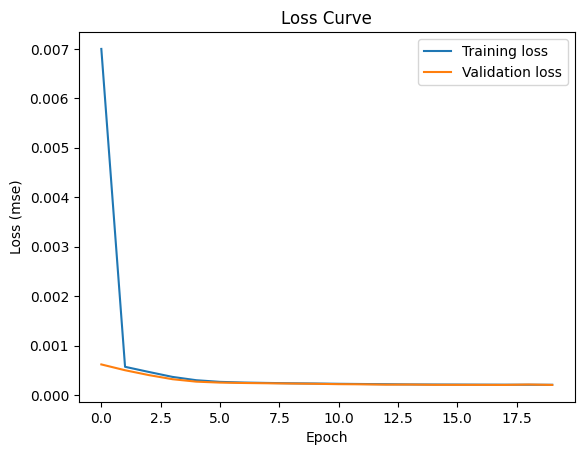

In [15]:
# Optional: Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [16]:
# #------------------------------------------
# # 4. Use the Autoencoder for Anomaly Detection
# #------------------------------------------

# # Compute reconstruction on the test set
X_new_test_pred = autoencoder.predict(X_new_test)
# # Calculate MSE per sample
mse = np.mean(np.power(X_new_test - X_new_test_pred, 2), axis=1)
#plot

# You need to define a threshold for what you consider "anomalous"
# This could be determined by analyzing the MSE distribution on training data, for example.
threshold = 1 #np.mean(mse) + 3*np.std(mse)  # Example heuristic

# Find anomalous events
anomalous_indices = np.where(mse > threshold)[0]

#------------------------------------------
# 5. Retrieve the Mass for Anomalous Events
#------------------------------------------

# For any anomalous event, we can now look up its mass
if len(anomalous_indices) > 0:
    print("Anomalous Event Indices:", anomalous_indices)
    print("Mass values for anomalous events:", mass_new_test[anomalous_indices])
else:
    print("No anomalies detected under this threshold.")


1081/1081 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
No anomalies detected under this threshold.


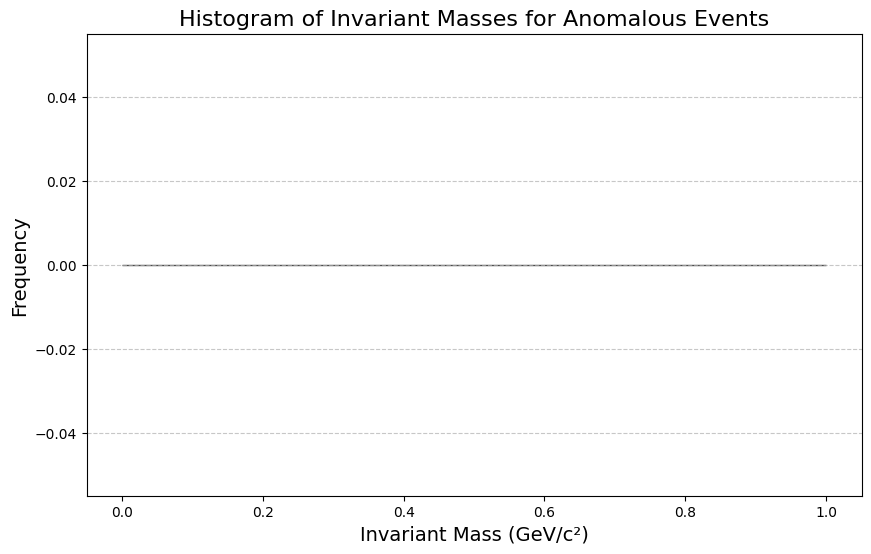

In [17]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(mass_new_test[anomalous_indices], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Invariant Masses for Anomalous Events', fontsize=16)
plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


Reconstruction error for anomalous events (label 0):
[4.88228201e-04 1.96492652e-04 3.89133509e-05 ... 1.33063672e-04
 3.74332282e-04 1.47329268e-04]


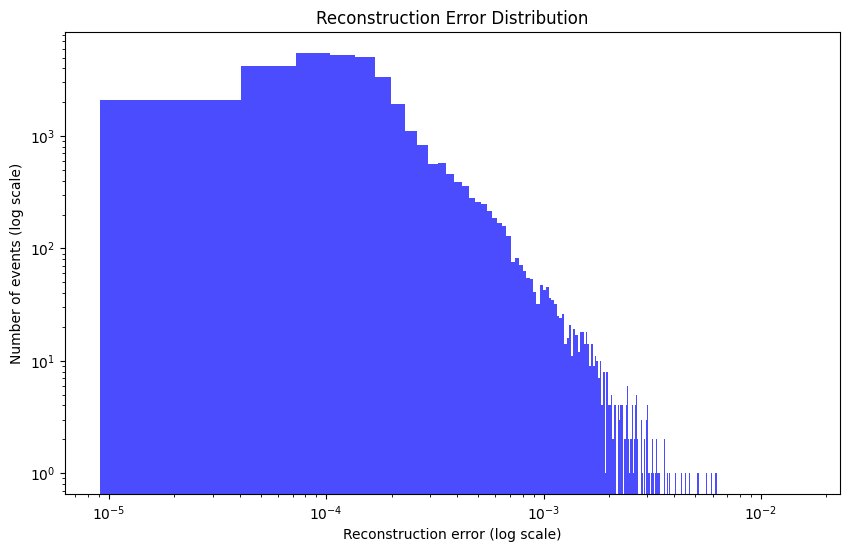

In [18]:
print("\nReconstruction error for anomalous events (label 0):")
print(mse)

# Plot the distributions of reconstruction errors for normal and anomalous events

plt.figure(figsize=(10, 6))
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
# Plot reconstruction error for normal events
# plt.hist(mse_normal, bins=50, alpha=0.7, label='Normal Events (Label 1)', color='blue')

# Plot reconstruction error for anomalous events
# plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events', color='red')
# plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events (Label 0)', color='red')

# Add labels and title
plt.hist(mse, bins=500, alpha=0.7, label="Normal Events", log=True, color = 'blue')  # Increase bins to 200 for finer binning and set log scale for y-axis
#plt.xscale('log')  # Log scale for x-axis
#plt.yscale('log')  # Log scale for y-axis
plt.xlabel("Reconstruction error (log scale)")
plt.ylabel("Number of events (log scale)")
plt.title("Reconstruction Error Distribution")
plt.show()

In [19]:
new_pq25 = new_df_all_25pq_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_new_pq25 = new_df_all_25pq_shuffled['InvariantMass'].values

new_pq25 = scaler.transform(new_pq25)

In [20]:
new_df_all_25pq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.117735,2,2.305854,0.203629,0.269269,0.598220,0.189089,2.491949,0.436979,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
1,1,3.045590,2,2.388058,0.078351,0.018395,0.269342,0.477320,2.331037,0.117997,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
2,2,3.186154,2,2.364736,0.000038,0.062227,0.385927,0.335219,2.394266,0.101664,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
3,3,3.124246,2,2.363794,0.004084,0.066061,0.377792,0.363086,2.321129,0.150950,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
4,4,3.123685,2,2.326507,0.132444,0.196801,0.520402,0.249151,2.588701,0.770100,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,4.406115,3,2.304412,0.201848,0.269740,0.679610,0.024565,2.398394,0.111334,...,1.703039,2.286529,2.330103,1.475699,0.704320,10.0,10.0,10.0,10.0,10.0
21,21,4.412237,3,2.258389,0.369574,0.437065,0.741151,0.141305,2.178634,0.635716,...,1.136508,4.240792,4.301858,3.189443,0.256467,10.0,10.0,10.0,10.0,10.0
22,22,4.318337,3,2.385128,0.062846,0.006081,0.175589,0.714240,2.449625,0.297696,...,0.802822,5.388530,5.454166,4.095259,0.708075,10.0,10.0,10.0,10.0,10.0
23,23,4.396265,3,2.292259,0.257925,0.319842,0.507287,0.483590,2.465905,0.355834,...,1.870740,1.709043,1.749181,0.999940,0.953833,10.0,10.0,10.0,10.0,10.0


In [21]:
new_pq25

array([[0.00000000e+00, 1.19694776e-04, 3.21710926e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.23962292e-04, 1.23783465e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.22751559e-04, 5.65539935e-06, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [5.00000000e-01, 1.23810189e-04, 9.92875141e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.18989013e-04, 4.07492663e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 1.26736260e-04, 4.12545050e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [22]:
new_pq25_pred = autoencoder.predict(new_pq25)
mse_new_pq25 = np.mean(np.power(new_pq25 - new_pq25_pred, 2), axis=1)


5405/5405 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step


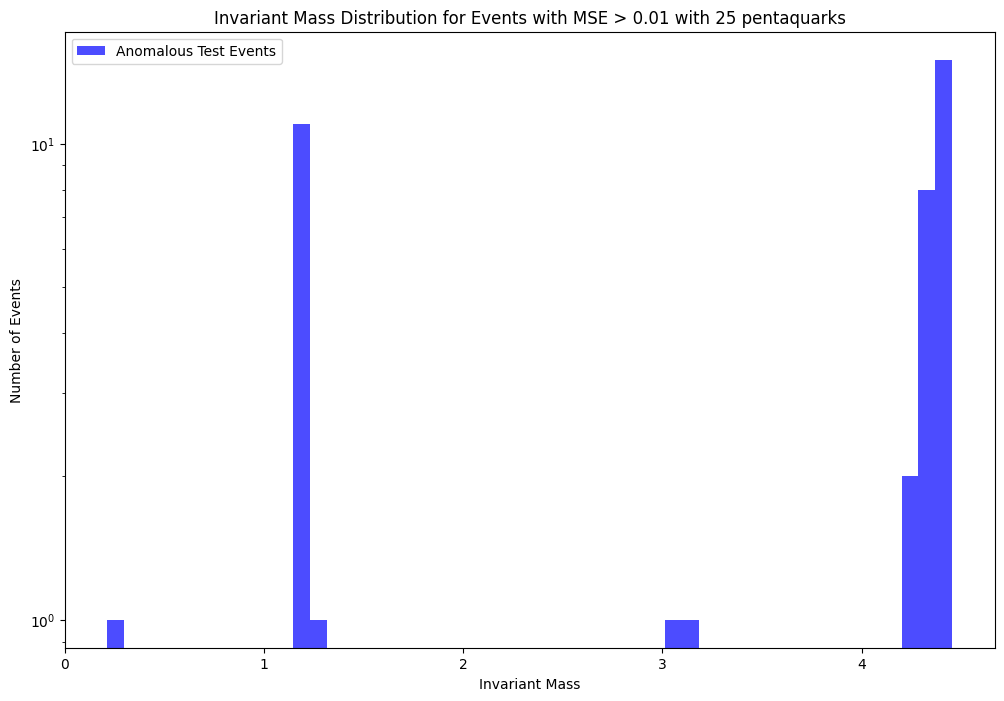

In [23]:
# Set the reconstruction error threshold
mse_threshold = 0.01  # Adjust this value as needed

# Filter test events with reconstruction error above the threshold
new_25pq_high_mse_indices = mse_new_pq25 > mse_threshold  # Boolean mask for filtering
new_25pq_high_mse_masses = mass_new_pq25[new_25pq_high_mse_indices]

# Plot the invariant mass distribution
plt.figure(figsize=(12, 8))

plt.hist(new_25pq_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# Add labels and title
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.yscale('log')
plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 25 pentaquarks')
plt.legend()

# Show the plot
plt.show()


In [24]:
new_25pq_high_mse_masses

array([3.10467951, 3.06777721, 1.19476192, 1.19106552, 1.19919235,
       1.29184647, 1.20804023, 1.20259884, 1.21652553, 1.19986421,
       1.20470013, 1.19352335, 1.19920978, 1.19581481, 0.2113173 ,
       4.35064894, 4.36678697, 4.38296856, 4.38408986, 4.384581  ,
       4.30681188, 4.38714122, 4.37849156, 4.28363047, 4.28523471,
       4.38691842, 4.37765393, 4.45500335, 4.44780782, 4.38431423,
       4.44357309, 4.36467367, 4.3574048 , 4.35446552, 4.37448189,
       4.40611464, 4.41223672, 4.31833686, 4.39626499, 4.33669605])

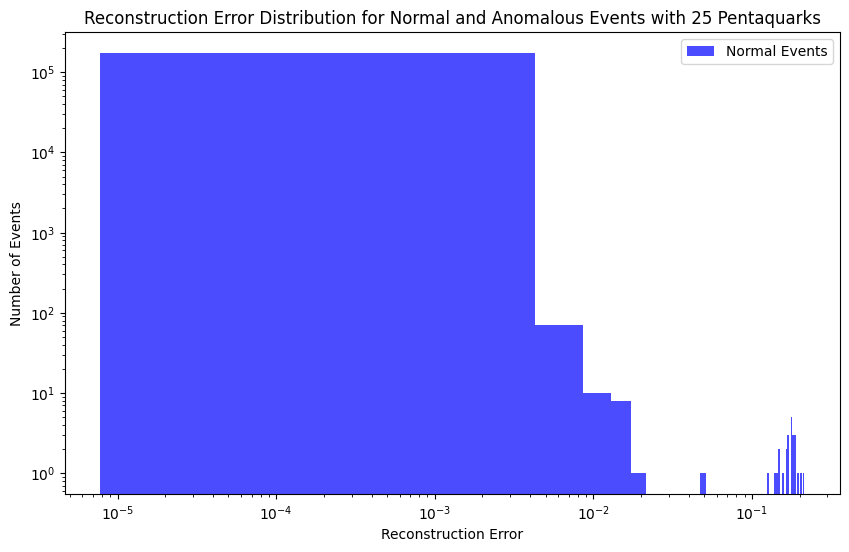

In [25]:
plt.figure(figsize=(10, 6))
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

plt.hist(mse_new_pq25, bins=50, alpha=0.7, label='Normal Events', color='blue')

plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
plt.title('Reconstruction Error Distribution for Normal and Anomalous Events with 25 Pentaquarks')
plt.legend()

# Show the plot
plt.show()

In [26]:
number_pqs_25 = np.sum((new_25pq_high_mse_masses >= 4) & (new_25pq_high_mse_masses <= 5))
number_pqs_25

np.int64(25)

In [27]:
# new_pq2 = new_df_all_2pq_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # # Extract mass separately
# # mass = df['mass'].values
# mass_new_pq2 = new_df_all_2pq_shuffled['InvariantMass'].values

# new_pq2 = scaler.transform(new_pq2)

In [28]:
# new_df_all_2pq_shuffled

In [29]:
# new_pq2_pred = autoencoder.predict(new_pq2)
# mse_new_pq2 = np.mean(np.power(new_pq2 - new_pq2_pred, 2), axis=1)


In [30]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# new_2pq_high_mse_indices = mse_new_pq2 > mse_threshold  # Boolean mask for filtering
# new_2pq_high_mse_masses = mass_new_pq2[new_2pq_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(new_2pq_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 2 pentaquarks')
# plt.legend()

# # Show the plot
# plt.show()


In [31]:
# new_2pq_high_mse_masses

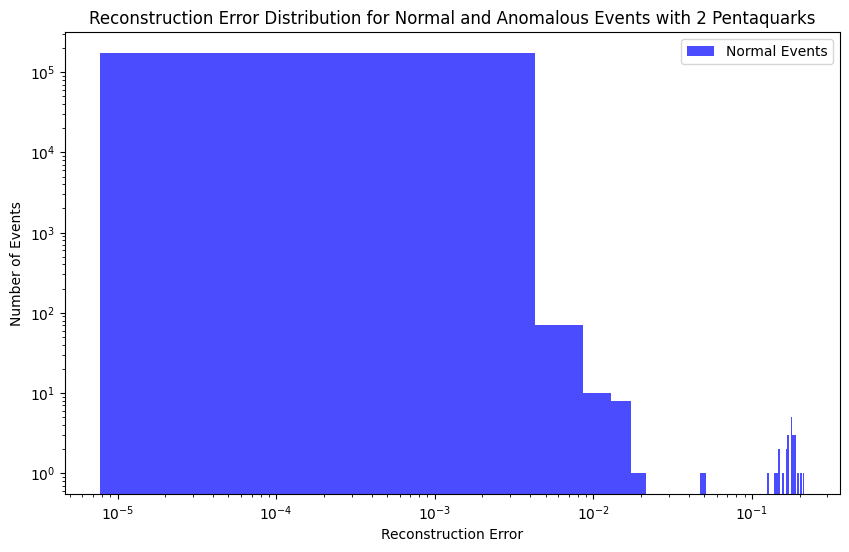

In [32]:
plt.figure(figsize=(10, 6))
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

plt.hist(mse_new_pq25, bins=50, alpha=0.7, label='Normal Events', color='blue')

plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
plt.title('Reconstruction Error Distribution for Normal and Anomalous Events with 2 Pentaquarks')
plt.legend()

# Show the plot
plt.show()

In [33]:
# number_pqs_2 = np.sum((new_2pq_high_mse_masses >= 4) & (new_2pq_high_mse_masses <= 5))
# number_pqs_2

### Jpsi -> 4 pions sigma dfs

In [34]:
# new_df_all_jpsi4pi_sigma

In [35]:
# new_with_jpsi4pi = new_df_all_jpsi4pi_sigma[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # # Extract mass separately
# # mass = df['mass'].values
# mass_new_with_jpsi_4pi = new_df_all_jpsi4pi_sigma['InvariantMass'].values

# new_with_jpsi4pi = scaler.transform(new_with_jpsi4pi)

In [36]:
# new_with_jpsi4pi

In [37]:
# new_with_jpsi4pi_pred = autoencoder.predict(new_with_jpsi4pi)
# mse_new_with_jpsi_4pi = np.mean(np.power(new_with_jpsi4pi - new_with_jpsi4pi_pred, 2), axis=1)

In [38]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# new_with_jpsi_4pi_high_mse_indices = mse_new_with_jpsi_4pi > mse_threshold  # Boolean mask for filtering
# new_with_jpsi_4pi_high_mse_masses = mass_new_with_jpsi_4pi[new_with_jpsi_4pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(new_with_jpsi_4pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 2 pentaquarks')
# plt.legend()

# # Show the plot
# plt.show()


In [39]:
# jpsi4pi_sigma_filtered = new_df_jpsi4pi_sigma_filtered[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_4pi = new_df_jpsi4pi_sigma_filtered['InvariantMass'].values
# mass_jpsi_4pi

# jpsi4pi_sigma_filtered = scaler.transform(jpsi4pi_sigma_filtered)

In [40]:
# jpsi4pi_pred = autoencoder.predict(jpsi4pi_sigma_filtered)
# mse_jpsi_4pi = np.mean(np.power(jpsi4pi_sigma_filtered - jpsi4pi_pred, 2), axis=1)

In [41]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_4pi_high_mse_indices = mse_jpsi_4pi > mse_threshold  # Boolean mask for filtering
# jpsi_4pi_high_mse_masses = mass_jpsi_4pi[jpsi_4pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_4pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} for Jpsi -> 4 pions')
# plt.legend()

# # Show the plot
# plt.show()


In [42]:
# new_df_all_jpsi3pi_sigma = pd.read_pickle("new_df_all_jpsi3pi_sigma.pkl")

# new_df_jpsi3pi_sigma_filtered = pd.read_pickle("new_df_jpsi3pi_sigma_filtered.pkl")
# new_df_jpsi3pi_sigma_filtered            

In [43]:
# jpsi3pi_all_sigma = new_df_all_jpsi3pi_sigma[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_3pi_all = new_df_all_jpsi3pi_sigma['InvariantMass'].values
# mass_jpsi_3pi_all

# jpsi3pi_all_sigma = scaler.transform(jpsi3pi_all_sigma)

In [44]:
# jpsi3pi_all_sigma_pred = autoencoder.predict(jpsi3pi_all_sigma)
# mse_jpsi_3pi_all_sigma = np.mean(np.power(jpsi3pi_all_sigma - jpsi3pi_all_sigma_pred, 2), axis=1)

In [45]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_3pi_all_high_mse_indices = mse_jpsi_3pi_all_sigma > mse_threshold  # Boolean mask for filtering
# jpsi_3pi_all_high_mse_masses = mass_jpsi_3pi_all[jpsi_3pi_all_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_3pi_all_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with Jpsi -> 3 pions')
# plt.legend()

# # Show the plot
# plt.show()


In [46]:
# jpsi3pi = new_df_jpsi3pi_sigma_filtered[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_3pi = new_df_jpsi3pi_sigma_filtered['InvariantMass'].values
# mass_jpsi_3pi

# jpsi3pi = scaler.transform(jpsi3pi)

In [47]:
# jpsi3pi_pred = autoencoder.predict(jpsi3pi)
# mse_jpsi_3pi = np.mean(np.power(jpsi3pi - jpsi3pi_pred, 2), axis=1)

In [48]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_3pi_high_mse_indices = mse_jpsi_3pi > mse_threshold  # Boolean mask for filtering
# jpsi_3pi_high_mse_masses = mass_jpsi_3pi[jpsi_3pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_3pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} for Jpsi -> 3 pions only')
# plt.legend()

# # Show the plot
# plt.show()


In [49]:
# jpsi_3pi_high_mse_masses